# Import the ns3 source script

In [14]:
import sys
sys.path.append("../../../../ns3_sem")
import sem
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
ns_path = '../../../../../ns3-dev-hofailure_RACH'
script = 'lena_hofailure'
campaign_dir = 'rngrun1'
campaign = sem.CampaignManager.new(ns_path, script, campaign_dir, overwrite=True)
print(campaign)

--- Campaign info ---
script: lena_hofailure
params: {'simTime': '50', 'MacroPower': 43.0, 'SmallPower': 20.0, 'nBlocks': '1', 'nMacroEnbSites': '1', 'macroUeDensity': '1e-05', 'homeEnbDeploymentRatio': '0.2', 'homeEnbActivationRatio': '0.5', 'homeUesHomeEnbRatio': '1', 'macroEnbDlEarfcn': '100', 'homeEnbDlEarfcn': '100', 'macroEnbBandwidth': '25', 'homeEnbBandwidth': '25', 'generateRem': 'false', 'epc': 'true', 'useUdp': 'true', 'outdoorUeSpeed': '5', 'handoverAlgorithm': 'A3', 'Hysteresis': 3.0, 'TimeToTrigger': 256.0, 'ServingCellThreshold': 20.0, 'NeighbourCellOffset': 5.0, 'SrsPeriodicity': 80.0, 'epcDl': 'true', 'epcUl': 'true', 'fadingTrace': '', 'homeEnbTxPowerDbm': '20', 'interSiteDistance': '500', 'macroEnbTxPowerDbm': '43', 'nMacroEnbSitesX': '1', 'numBearersPerUe': '1', 'remRbId': '-1', 'srsPeriodicity': '80'}
HEAD: 80f1dc6191d4ae11b480b025d917339525a17fc4
Runner type: <class 'sem.parallelrunner.ParallelRunner'>
-----------


## Params

In [22]:
import numpy as np
param_combination = {'simTime':3000, 
                     'MacroPower':46,
                     'SmallPower':24,
                     'nBlocks': 5, #list([1,2,3,4,5,6,7,8,9,10]),#round(4*nBlocks*0.1)
                     'nMacroEnbSites': 1, #list([1,2,3,4,5,6,7,8,9,10]),
                     'nMacroEnbSitesX': 1,
                     'macroUeDensity': 0.0000025,#4000x4000 [p * 0.5 for p in range(0.0001, 0.01)]
                     'homeEnbDeploymentRatio': 1.0,
                     'homeEnbActivationRatio': 1.0,
                     'homeUesHomeEnbRatio': 1.0,
                     'outdoorUeSpeed': list([1.0,5.0,10.0]),#[j * 2.0 for j in range(2.0, 10.0)]
                     'handoverAlgorithm': 'A3',
                     'Hysteresis': [j * 1.0 for j in np.arange(0.0, 3.2, 0.5)],
                     'TimeToTrigger':  list([40.0, 64.0, 80.0, 100.0, 128.0, 160.0, 256.0]),
                     'SrsPeriodicity': 80,
                     'generateRem': 0,
                     'RngRun': [1]
                    }

# Running the simulation with the params

In [16]:
campaign.run_missing_simulations(param_combination, stop_on_errors=False)

Running simulations: 100%|████████████████████████████████████████████████████████████████████████████| 147/147 [10:14:21<00:00, 250.76s/simulation]


# Load the results

In [43]:
import sys
sys.path.append("../../../../../ns3_sem")
import sem
import pprint
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import seaborn as sns
import numpy
import numpy as np

In [44]:
campaign_dir = 'rngrun1/'
campaign = sem.CampaignManager.load(campaign_dir, check_repo=False)

In [45]:
param_combination = {'simTime':3000, 
                     'MacroPower':46,
                     'SmallPower':24,
                     'nBlocks': 5, #list([1,2,3,4,5,6,7,8,9,10]),#round(4*nBlocks*0.1)
                     'nMacroEnbSites': 1, #list([1,2,3,4,5,6,7,8,9,10]),
                     'nMacroEnbSitesX': 1,
                     'macroUeDensity': 0.0000025,#4000x4000 [p * 0.5 for p in range(0.0001, 0.01)]
                     'homeEnbDeploymentRatio': 1.0,
                     'homeEnbActivationRatio': 1.0,
                     'homeUesHomeEnbRatio': 1.0,
                     'outdoorUeSpeed': list([1.0,5.0,10.0]),#[j * 2.0 for j in range(2.0, 10.0)]
                     'handoverAlgorithm': 'A3',
                     'Hysteresis': [j * 1.0 for j in np.arange(0.0, 3.2, 0.5)],
                     'TimeToTrigger':  list([40.0, 64.0, 80.0, 100.0, 128.0, 160.0, 256.0]),
                     'SrsPeriodicity': 80,
                     'generateRem': 0,
                     'RngRun': [1]
                    }

# Summarize the result

In [53]:
def get_average_res(result):
    if result['output']['stderr'] != "":
        num_HOs = -1
        num_RLFs = -1
        num_HFJs = -1
        num_HFLs = -1
    else:
        split_results = result['output']['stdout'].split("\n")
        num_HOs = 0
        num_SMhos = 0
        num_SMho_fail = 0
        num_MSho_fail = 0
        num_MShos = 0
        num_RLFs = 0
        num_HFJs = 0
        num_HFLs = 0
    
    for line in split_results:
        num_HOs += line.count("Handover_start")
        num_SMhos += line.count("Small to Macro")
        num_SMho_fail += line.count("targetCellId 1")
        num_MShos += line.count("Macro to Small")
        num_HFJs += line.count("Handover_Failure_JoiningTimeout")
        num_RLFs += line.count("Radio_link_failure_detected")
    
    num_MSho_fail = num_HFJs - num_SMho_fail + num_RLFs
    num_MShos = num_MShos + num_RLFs
    
    return [num_HOs, num_SMhos, num_SMho_fail, 
            num_MShos, num_MSho_fail, num_RLFs, num_HFJs, num_HFLs]

# the result of generate dataframe

In [54]:
results = campaign.get_results_as_dataframe(get_average_res, 
                                            ['num_HOs', 'num_SMhos','num_SMho_fail',
                                             'num_MShos','num_MSho_fail','num_RLFs','num_HFJs','num_HFLs'], 
                                            params = param_combination, drop_constant_columns=True)
print(results)

     outdoorUeSpeed  Hysteresis  TimeToTrigger  num_HOs  num_SMhos  \
0               1.0         0.0           40.0        4          4   
1               1.0         0.0           64.0        4          4   
2               1.0         0.0           80.0        4          4   
3               1.0         0.0          100.0        4          4   
4               1.0         0.0          128.0        4          4   
..              ...         ...            ...      ...        ...   
142            10.0         3.0           80.0       39         37   
143            10.0         3.0          100.0       39         37   
144            10.0         3.0          128.0       39         37   
145            10.0         3.0          160.0       39         37   
146            10.0         3.0          256.0       39         37   

     num_SMho_fail  num_MShos  num_MSho_fail  num_RLFs  num_HFJs  
0                2          4              4         4         2  
1                0       

# Plot the result

"\nplt.rcParams.update({'font.size':14})\nfig = plt.figure(figsize=(9, 7))\nax = plt.axes()\n#ax.plot(results_Hys['Hysteresis'], results_Hys['num_HOs'], color = 'blue')\nax.plot(results_Hys['Hysteresis'], results_Hys['num_SMhos'], color = 'blue')\nax.plot(results_Hys['Hysteresis'], results_Hys['num_MShos'], color = 'green')\nax.plot(results_Hys['Hysteresis'], results_Hys['num_SMho_fail'], color = 'red')\nax.plot(results_Hys['Hysteresis'], results_Hys['num_MSho_fail'], color = 'orange')\n\n#ax.plot(results_Hys['Hysteresis'], results_Hys['num_RLFs'], color = 'black')\nax.grid()\nax.set_xlabel('Hysteresis')\nax.set_ylabel('Number of S->M and M->S handover')\nax.set_title('TimeToTrigger = 100 ms, speed = 5 m/s')\nax.legend(['num_SMhos', 'num_MShos','num_SMho_fail','num_MSho_fail'])\n"

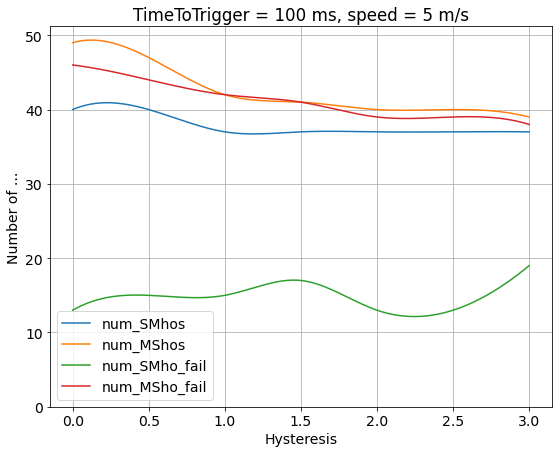

In [61]:
from scipy.interpolate import interp1d

results_Hys = results[(results['TimeToTrigger'] == 100.0) & (results['outdoorUeSpeed'] == 10.0)]

x_data = results_Hys['Hysteresis'].to_numpy()
y_data1 = results_Hys['num_SMhos'].to_numpy()
y_data2 = results_Hys['num_MShos'].to_numpy()
y_data3 = results_Hys['num_SMho_fail'].to_numpy()
y_data4 = results_Hys['num_MSho_fail'].to_numpy()

sorted_indices = np.argsort(x_data)
x_data = x_data[sorted_indices]
y_data1 = y_data1[sorted_indices]
y_data2 = y_data2[sorted_indices]
y_data3 = y_data3[sorted_indices]
y_data4 = y_data4[sorted_indices]

interp_func1 = interp1d(x_data, y_data1, kind='cubic', fill_value="extrapolate")
interp_func2 = interp1d(x_data, y_data2, kind='cubic', fill_value="extrapolate")
interp_func3 = interp1d(x_data, y_data3, kind='cubic', fill_value="extrapolate")
interp_func4 = interp1d(x_data, y_data4, kind='cubic', fill_value="extrapolate")

x_smooth = np.linspace(x_data.min(), x_data.max(), 300)
y_smooth1 = interp_func1(x_smooth)
y_smooth2 = interp_func2(x_smooth)
y_smooth3 = interp_func3(x_smooth)
y_smooth4 = interp_func4(x_smooth)

fig = plt.figure(figsize=(9, 7))
ax = plt.axes()
ax.plot(x_smooth, y_smooth1, label='num_SMhos')
ax.plot(x_smooth, y_smooth2, label='num_MShos')
ax.plot(x_smooth, y_smooth3, label='num_SMho_fail')
ax.plot(x_smooth, y_smooth4, label='num_MSho_fail')
ax.grid()
ax.set_xlabel('Hysteresis')
ax.set_ylabel('Number of ...')
ax.set_title('TimeToTrigger = 100 ms, speed = 5 m/s')
ax.set_ylim(bottom=0)
ax.legend(['num_SMhos', 'num_MShos','num_SMho_fail','num_MSho_fail'])
"""
plt.rcParams.update({'font.size':14})
fig = plt.figure(figsize=(9, 7))
ax = plt.axes()
#ax.plot(results_Hys['Hysteresis'], results_Hys['num_HOs'], color = 'blue')
ax.plot(results_Hys['Hysteresis'], results_Hys['num_SMhos'], color = 'blue')
ax.plot(results_Hys['Hysteresis'], results_Hys['num_MShos'], color = 'green')
ax.plot(results_Hys['Hysteresis'], results_Hys['num_SMho_fail'], color = 'red')
ax.plot(results_Hys['Hysteresis'], results_Hys['num_MSho_fail'], color = 'orange')

#ax.plot(results_Hys['Hysteresis'], results_Hys['num_RLFs'], color = 'black')
ax.grid()
ax.set_xlabel('Hysteresis')
ax.set_ylabel('Number of S->M and M->S handover')
ax.set_title('TimeToTrigger = 100 ms, speed = 5 m/s')
ax.legend(['num_SMhos', 'num_MShos','num_SMho_fail','num_MSho_fail'])
"""

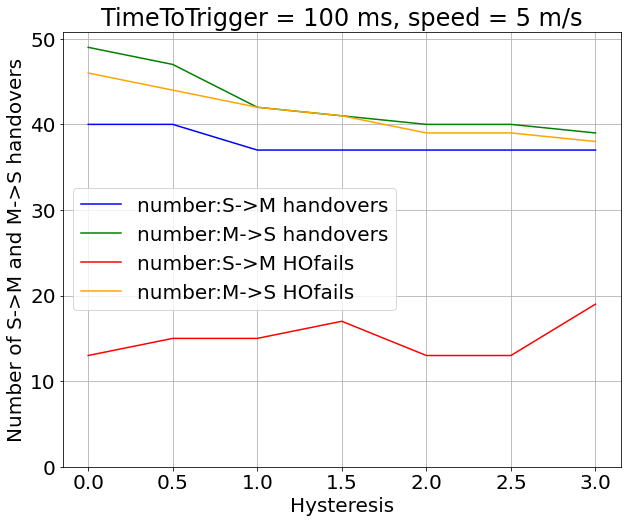

In [72]:
results_Hys = results[(results['TimeToTrigger'] == 100.0) & (results['outdoorUeSpeed'] == 10.0)]
plt.rcParams.update({'font.size':20})
fig = plt.figure(figsize=(10, 8))
ax = plt.axes()
#ax.plot(results_Hys['Hysteresis'], results_Hys['num_HOs'], color = 'blue')
ax.plot(results_Hys['Hysteresis'], results_Hys['num_SMhos'], color = 'blue')
ax.plot(results_Hys['Hysteresis'], results_Hys['num_MShos'], color = 'green')
ax.plot(results_Hys['Hysteresis'], results_Hys['num_SMho_fail'], color = 'red')
ax.plot(results_Hys['Hysteresis'], results_Hys['num_MSho_fail'], color = 'orange')

#ax.plot(results_Hys['Hysteresis'], results_Hys['num_RLFs'], color = 'black')
ax.grid()
ax.set_xlabel('Hysteresis')
ax.set_ylabel('Number of S->M and M->S handovers')
ax.set_title('TimeToTrigger = 100 ms, speed = 5 m/s')
ax.set_ylim(bottom=0)
ax.legend(['number:S->M handovers', 'number:M->S handovers','number:S->M HOfails','number:M->S HOfails'])

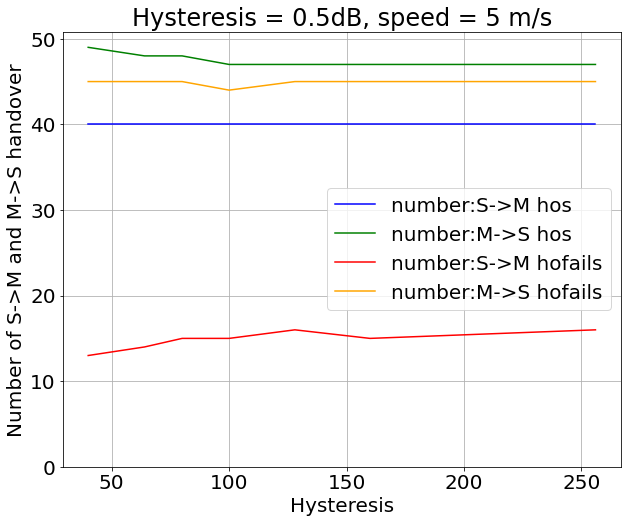

In [69]:
results_Hys = results[(results['Hysteresis'] == 0.5) & (results['outdoorUeSpeed'] == 10.0)]
plt.rcParams.update({'font.size':20})
fig = plt.figure(figsize=(10, 8))
ax = plt.axes()
#ax.plot(results_Hys['Hysteresis'], results_Hys['num_HOs'], color = 'blue')
ax.plot(results_Hys['TimeToTrigger'], results_Hys['num_SMhos'], color = 'blue')
ax.plot(results_Hys['TimeToTrigger'], results_Hys['num_MShos'], color = 'green')
ax.plot(results_Hys['TimeToTrigger'], results_Hys['num_SMho_fail'], color = 'red')
ax.plot(results_Hys['TimeToTrigger'], results_Hys['num_MSho_fail'], color = 'orange')

#ax.plot(results_Hys['Hysteresis'], results_Hys['num_RLFs'], color = 'black')
ax.grid()
ax.set_xlabel('Hysteresis')
ax.set_ylabel('Number of S->M and M->S handover')
ax.set_title('Hysteresis = 0.5dB, speed = 5 m/s')
ax.set_ylim(bottom=0)
ax.legend(['number:S->M hos', 'number:M->S hos','number:S->M hofails','number:M->S hofails'])